# Character recognition


<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Character-recognition" data-toc-modified-id="Character-recognition-1">Character recognition</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Layer-definitions" data-toc-modified-id="Layer-definitions-1.0.1">Layer definitions</a></span></li><li><span><a href="#Setting-hyperparameters" data-toc-modified-id="Setting-hyperparameters-1.0.2">Setting hyperparameters</a></span></li><li><span><a href="#Train-and-test" data-toc-modified-id="Train-and-test-1.0.3">Train and test</a></span></li><li><span><a href="#Without-Dropouts" data-toc-modified-id="Without-Dropouts-1.0.4">Without Dropouts</a></span></li></ul></li></ul></li></ul></div>

In [31]:
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
import numpy as np, random
from PIL import Image
from sklearn import linear_model
from sklearn import metrics

In [3]:
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)  # y labels are oh-encoded

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [12]:
n_train = mnist.train.num_examples  # 55,000
n_validation = mnist.validation.num_examples  # 5000
n_test = mnist.test.num_examples  # 10,000

### Layer definitions

In [13]:
n_input = 784  # input layer (28x28 pixels)
n_hidden1 = 512  # 1st hidden layer
n_hidden2 = 256  # 2nd hidden layer
n_hidden3 = 128  # 3rd hidden layer
n_output = 10  # output layer (0-9 digits)

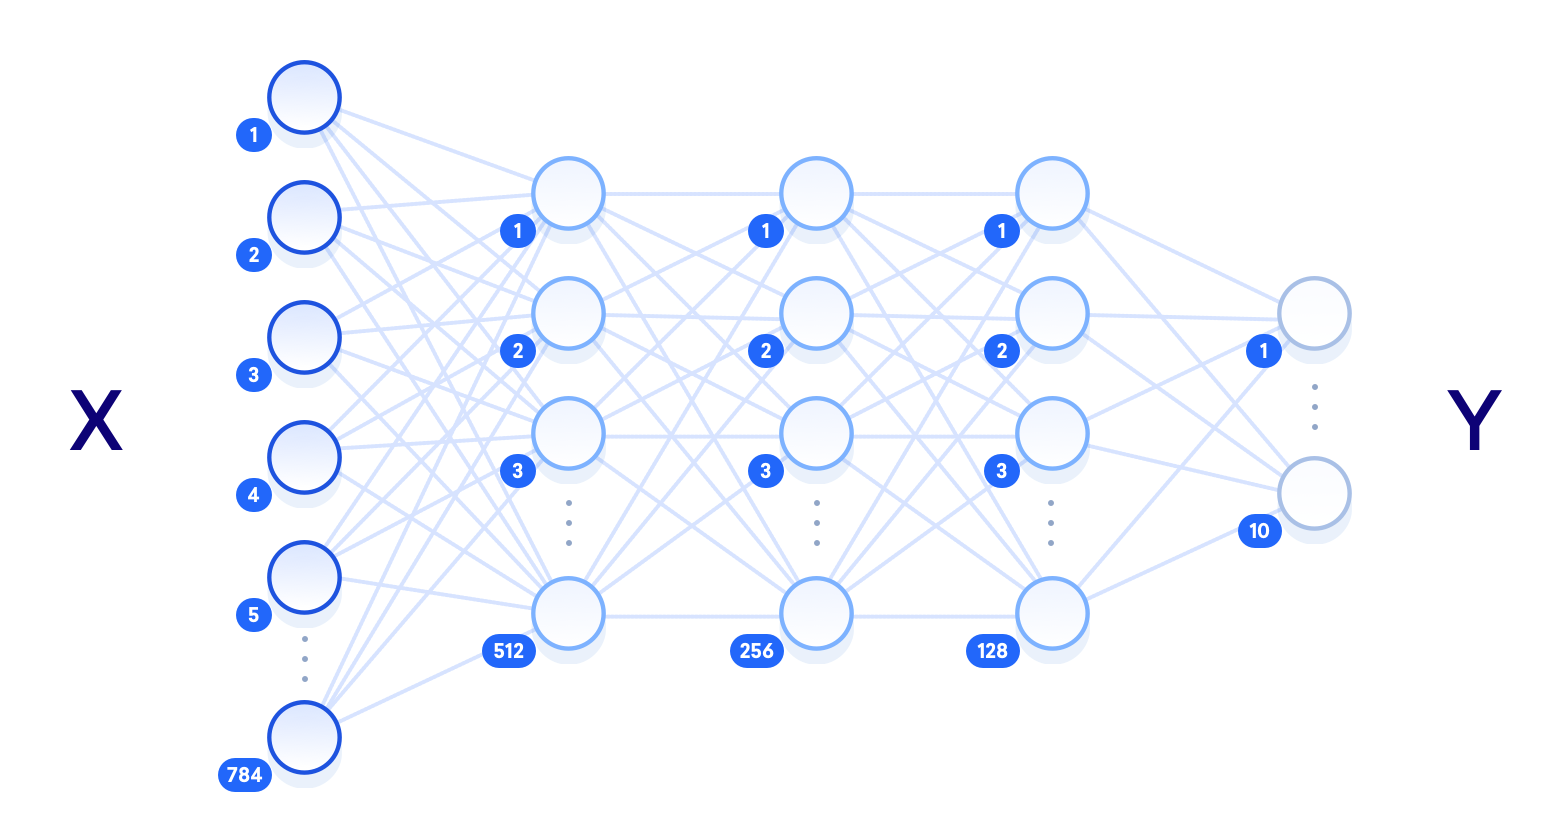

### Setting hyperparameters

In [14]:
learning_rate = 1e-4
n_iterations = 1000
batch_size = 128
dropout = 0.5

In [15]:
X = tf.placeholder("float", [None, n_input])
Y = tf.placeholder("float", [None, n_output])
rate = tf.placeholder(tf.float32)

In [16]:
weights = {
    'w1': tf.Variable(tf.truncated_normal([n_input, n_hidden1], stddev=0.1)),
    'w2': tf.Variable(tf.truncated_normal([n_hidden1, n_hidden2], stddev=0.1)),
    'w3': tf.Variable(tf.truncated_normal([n_hidden2, n_hidden3], stddev=0.1)),
    'out': tf.Variable(tf.truncated_normal([n_hidden3, n_output], stddev=0.1)),
}

In [17]:
biases = {
    'b1': tf.Variable(tf.constant(0.1, shape=[n_hidden1])),
    'b2': tf.Variable(tf.constant(0.1, shape=[n_hidden2])),
    'b3': tf.Variable(tf.constant(0.1, shape=[n_hidden3])),
    'out': tf.Variable(tf.constant(0.1, shape=[n_output]))
}

In [18]:
layer_1 = tf.add(tf.matmul(X, weights['w1']), biases['b1'])
layer_2 = tf.add(tf.matmul(layer_1, weights['w2']), biases['b2'])
layer_3 = tf.add(tf.matmul(layer_2, weights['w3']), biases['b3'])
layer_drop = tf.nn.dropout(layer_3, rate)
output_layer = tf.matmul(layer_3, weights['out']) + biases['out']

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [19]:
cross_entropy = tf.reduce_mean(
    tf.nn.softmax_cross_entropy_with_logits_v2(
        labels=Y, logits=output_layer
        ))
train_step = tf.train.AdamOptimizer(1e-4).minimize(cross_entropy)

### Train and test

In [20]:
correct_pred = tf.equal(tf.argmax(output_layer, 1), tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))

In [21]:
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

In [23]:
# train on mini batches
for i in range(n_iterations):
    batch_x, batch_y = mnist.train.next_batch(batch_size)
    sess.run(train_step, feed_dict={
        X: batch_x, Y: batch_y, rate: dropout
        })

    # print loss and accuracy (per minibatch)
    if i % 100 == 0:
        minibatch_loss, minibatch_accuracy = sess.run(
            [cross_entropy, accuracy],
            feed_dict={X: batch_x, Y: batch_y, rate: 0}
            )
        print(
            "Iteration",
            str(i),
            "\t| Loss =",
            str(minibatch_loss),
            "\t| Accuracy =",
            str(minibatch_accuracy)
            )

Iteration 0 	| Loss = 3.343381 	| Accuracy = 0.1015625
Iteration 100 	| Loss = 0.48383573 	| Accuracy = 0.8671875
Iteration 200 	| Loss = 0.35493755 	| Accuracy = 0.9140625
Iteration 300 	| Loss = 0.2747818 	| Accuracy = 0.90625
Iteration 400 	| Loss = 0.4736585 	| Accuracy = 0.859375
Iteration 500 	| Loss = 0.33637595 	| Accuracy = 0.8984375
Iteration 600 	| Loss = 0.3681965 	| Accuracy = 0.8828125
Iteration 700 	| Loss = 0.3195111 	| Accuracy = 0.921875
Iteration 800 	| Loss = 0.34982035 	| Accuracy = 0.890625
Iteration 900 	| Loss = 0.22760531 	| Accuracy = 0.921875


> Stochastic gradient descent is the process of quickly converging at the minimum of the function, for any chosen metric. The term stochastic means the starting point is random. Once the starting point is chosen, the method traverses the curve iteratively until it arrives at *a* minimum. Now the advantage of this over a gradient descent considering all the variables is that this is extremely fast interms of computation and arrives at a fairly accurate minima most of the times.
> But the primary disadvantage is that since the starting point is chosen at random, it has a tendency of getting stuck at a local minima rather than the global minima which it was supposed to find.
> the Adam optimizer used in the code only has a slight difference in which it uses a momentum factor to speed up the process of arriving at the minima. Though this doesnt solve the problem of its tendency to locate local minima.

In [24]:
test_accuracy = sess.run(accuracy, feed_dict={X: mnist.test.images[6601:], Y: mnist.test.labels[6601:], rate: 0})
print("\nAccuracy on test set:", test_accuracy)


Accuracy on test set: 0.9367461


In [67]:
img = np.invert(Image.open("test_img.png").convert('L')).ravel()
prediction = sess.run(tf.argmax(output_layer, 1), feed_dict={X: [img]})
print ("Prediction for test image:", np.squeeze(prediction))

Prediction for test image: 2


### Without Dropouts

In [25]:
layer_1 = tf.add(tf.matmul(X, weights['w1']), biases['b1'])
layer_2 = tf.add(tf.matmul(layer_1, weights['w2']), biases['b2'])
layer_3 = tf.add(tf.matmul(layer_2, weights['w3']), biases['b3'])
# layer_drop = tf.nn.dropout(layer_3, rate)
output_layer = tf.matmul(layer_3, weights['out']) + biases['out']

cross_entropy = tf.reduce_mean(
    tf.nn.softmax_cross_entropy_with_logits_v2(
        labels=Y, logits=output_layer
        ))
train_step = tf.train.AdamOptimizer(1e-4).minimize(cross_entropy)

### Train and test

correct_pred = tf.equal(tf.argmax(output_layer, 1), tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))

init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

# train on mini batches
for i in range(n_iterations):
    batch_x, batch_y = mnist.train.next_batch(batch_size)
    sess.run(train_step, feed_dict={
        X: batch_x, Y: batch_y,
#         rate: dropout
        })

    # print loss and accuracy (per minibatch)
    if i % 100 == 0:
        minibatch_loss, minibatch_accuracy = sess.run(
            [cross_entropy, accuracy],
            feed_dict={X: batch_x, Y: batch_y, rate: 0}
            )
        print(
            "Iteration",
            str(i),
            "\t| Loss =",
            str(minibatch_loss),
            "\t| Accuracy =",
            str(minibatch_accuracy)
            )

Iteration 0 	| Loss = 3.7978654 	| Accuracy = 0.109375
Iteration 100 	| Loss = 0.37563193 	| Accuracy = 0.90625
Iteration 200 	| Loss = 0.34372005 	| Accuracy = 0.890625
Iteration 300 	| Loss = 0.35562 	| Accuracy = 0.8984375
Iteration 400 	| Loss = 0.32402495 	| Accuracy = 0.890625
Iteration 500 	| Loss = 0.18750533 	| Accuracy = 0.96875
Iteration 600 	| Loss = 0.17726457 	| Accuracy = 0.9296875
Iteration 700 	| Loss = 0.26514095 	| Accuracy = 0.921875
Iteration 800 	| Loss = 0.3207993 	| Accuracy = 0.921875
Iteration 900 	| Loss = 0.2351717 	| Accuracy = 0.9296875


In [26]:
test_accuracy = sess.run(accuracy, feed_dict={X: mnist.test.images[6601:], Y: mnist.test.labels[6601:], rate: 0})
print("\nAccuracy on test set:", test_accuracy)


Accuracy on test set: 0.93733454


> In very basic terms, Dropouts are an extremely fast (computationally) method to prevent overfitting in a neural network. This is achieved by ignoring some neurons at random while training. This forces the other neurons to also compensate for the missing neuron, forcing them to learn more generously and not keep fitting on the same patterns. This makes the model more generalized and each neuron does not overfit on some certain values. Dropout forces a neural network to learn more robust features that are useful in conjunction with many different random subsets of the other neurons.

`Since the output is a categorical classification from 0-9, any classification algorith would have served the purpose in this case. A Random forest and Multinomial logit on the vector of pixels(X) with the Y as a vector identifying the classified digit, will perform fairly accurately`

In [33]:
x_train = mnist.train.images[:55000,:]
print ('x_train Examples Loaded = ' + str(x_train.shape))
y_train = mnist.train.labels[:55000,:]
print ('y_train Examples Loaded = ' + str(y_train.shape))
x_test = mnist.test.images[:10000,:]
print ('x_train Examples Loaded = ' + str(x_test.shape))
y_test = mnist.test.labels[:10000,:]
print ('y_train Examples Loaded = ' + str(y_test.shape))

a = np.array(y_train)
y_train=[np.where(r==1)[0][0] for r in a]
a = np.array(y_test)
y_test=[np.where(r==1)[0][0] for r in a]

x_train Examples Loaded = (55000, 784)
y_train Examples Loaded = (55000, 10)
x_train Examples Loaded = (10000, 784)
y_train Examples Loaded = (10000, 10)


In [32]:
mul_lr = linear_model.LogisticRegression(multi_class='multinomial', solver='lbfgs',max_iter=5000).fit(x_train,y_train)

print("Logistic regression Train Accuracy : ", metrics.accuracy_score(y_train, mul_lr.predict(x_train)))

Logistic regression Train Accuracy ::  0.9386545454545454


In [34]:
print("Logistic regression Train Accuracy(OOS): ", metrics.accuracy_score(y_test, mul_lr.predict(x_test)))

Logistic regression Train Accuracy(OOS):  0.9265
